In [1]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

import weightedcalcs as wc

In [5]:
cntryname = ['AUS','AUT','BEL','CAN','DNK','FIN','FRA','DEU','GRC','ITA', 'JPN', 'NLD', 'NZL','NOR','PRT','ESP','SWE','GBR','USA']

In [48]:
dftrade = pd.read_csv("trade_model_efficient_data.csv")

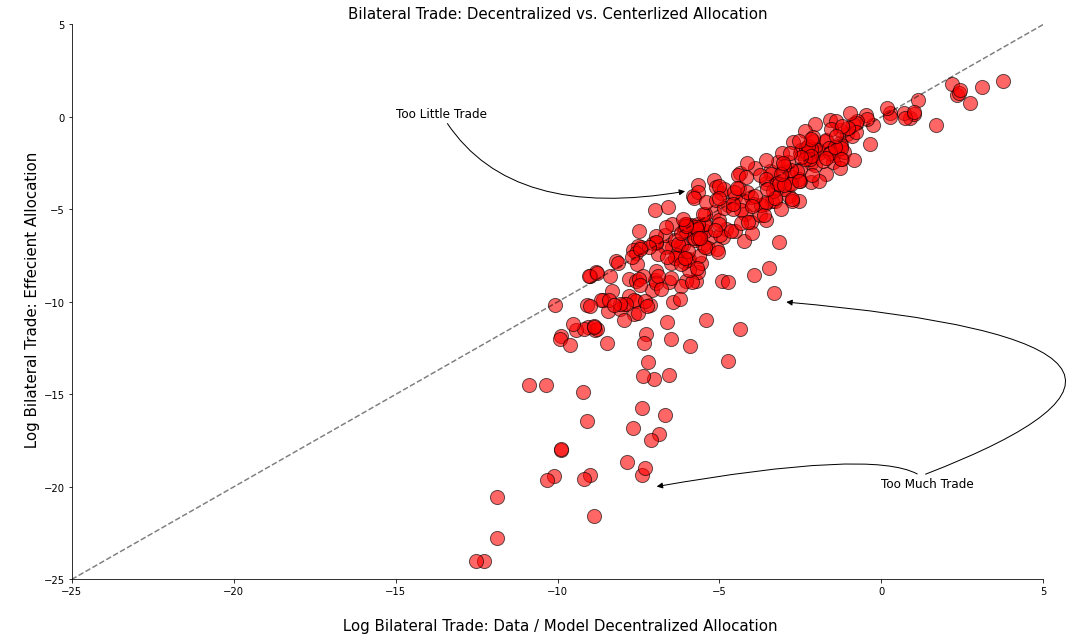

In [90]:
fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

foo = dftrade[dftrade.importer_index != dftrade.exporter_index]

ax.scatter(foo.tradedata, foo.norm_trade_efficient,  alpha = 0.60, c = "red", edgecolors = "black", s = 200)

ax.plot(range(-25,6), range(-25,6), alpha = 0.50, linestyle = "--", c = "black")

ax.set_xlim(-25,5)
ax.set_ylim(-25,5)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Bilateral Trade: Decentralized vs. Centerlized Allocation", fontsize = 15)

ax.set_xlabel("\n Log Bilateral Trade: Data / Model Decentralized Allocation", fontsize = 15)
ax.set_ylabel("\n Log Bilateral Trade: Effecient Allocation" , fontsize = 15)

ax.annotate(
    "Too Much Trade", 
    xy=(-7, -20), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(0, -20), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=300,angleB=10",
        "color": "black"
    },
    fontsize=12,
)


ax.annotate(
    "               ", 
    xy=(-3, -10), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(1.5, -20), # This is about where the text is
    horizontalalignment="right", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=200,angleB=-5",
        "color": "black"
    },
    fontsize=12,
)


ax.annotate(
    "Too Little Trade", 
    xy=(-6, -4), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(-15, 0), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=300,angleB=10",
        "color": "black"
    },
    fontsize=12,
)


plt.savefig("../notes/figures/decentralized-trade-all.pdf", bbox_inches = "tight")

plt.show()

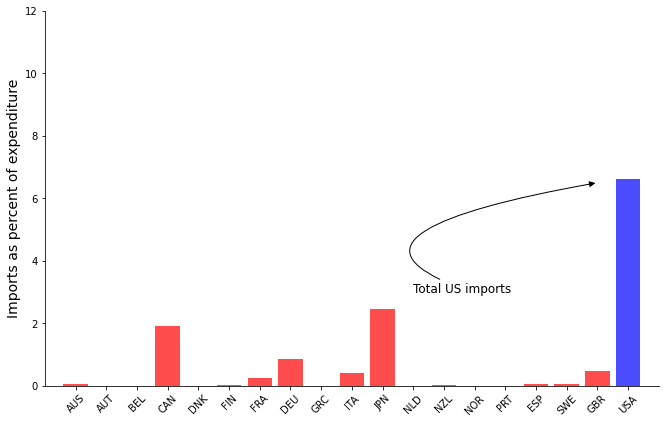

In [91]:
cntry = 19

foo = dftrade[dftrade.importer_index == cntry]

bar = foo[foo.exporter_index != cntry]

uscond = foo.exporter_index == cntry

fig, ax = plt.subplots(figsize = (11,6.9))

ax.bar(bar.exporter_index, 100*bar.trademodel,
       alpha = 0.70, color = "red")



ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xticks(np.arange(1,20))
ax.set_xticklabels(cntryname,rotation=45, fontsize = 10)

ax.set_ylabel("Imports as percent of expenditure", fontsize = 14)

ax.bar(foo[uscond].exporter_index, 100*(1-foo[uscond].trademodel),
       alpha = 0.70, color = "blue")

ax.set_xlim(0,20)
ax.set_ylim(0,12)

ax.annotate(
    "Total US imports", 
    xy=(18., 6.5), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(12, 3), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=340,angleB=10",
        "color": "black"
    },
    fontsize=12,
)

plt.savefig("../notes/figures/decentralized-trade-us.pdf", bbox_inches = "tight")

plt.show()

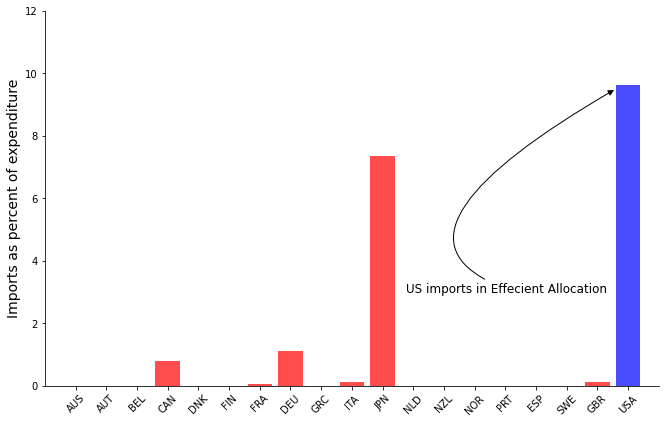

In [92]:
cntry = 19

foo = dftrade[dftrade.importer_index == cntry]

bar = foo[foo.exporter_index != cntry]

uscond = foo.exporter_index == cntry

fig, ax = plt.subplots(figsize = (11,6.9))

ax.bar(bar.exporter_index, 100*bar.trade_efficient,
       alpha = 0.70, color = "red")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xticks(np.arange(1,20))
ax.set_xticklabels(cntryname,rotation=45, fontsize = 10)

ax.set_ylabel("Imports as percent of expenditure", fontsize = 14)

ax.bar(foo[uscond].exporter_index, 100*(1-foo[uscond].trade_efficient),
       alpha = 0.70, color = "blue")

ax.set_xlim(0,20)
ax.set_ylim(0,12)

ax.annotate(
    "US imports in Effecient Allocation", 
    xy=(18.6, 9.5), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(11.75, 3), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=340,angleB=30",
        "color": "black"
    },
    fontsize=12,
)

plt.savefig("../notes/figures/planner-trade-us.pdf", bbox_inches = "tight")

plt.show()

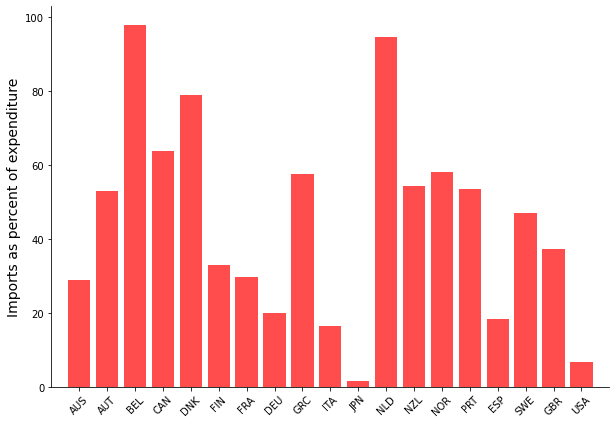

In [37]:
foo = dftrade[dftrade.importer_index == dftrade.exporter_index]

fig, ax = plt.subplots(figsize = (10,7))

ax.bar(foo.exporter_index, 100*(1 - foo.trademodel),
       alpha = 0.70, color = "red")

ax.set_xlim(0,20)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xticks(np.arange(1,20))
ax.set_xticklabels(cntryname,rotation=45, fontsize = 10)

ax.set_ylabel("Imports as percent of expenditure", fontsize = 14)

plt.show()

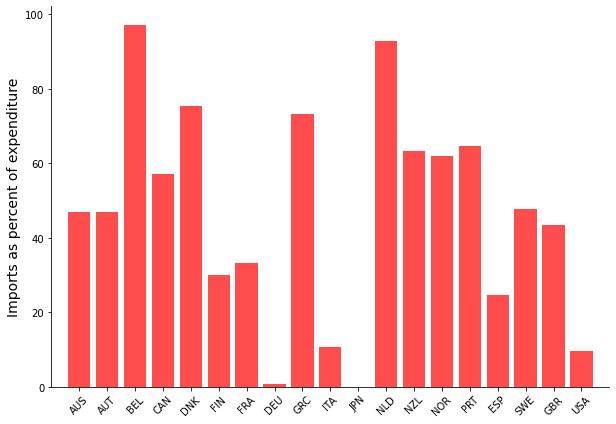

In [38]:
foo = dftrade[dftrade.importer_index == dftrade.exporter_index]

fig, ax = plt.subplots(figsize = (10,7))

ax.set_xlim(0,20)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xticks(np.arange(1,20))
ax.set_xticklabels(cntryname,rotation=45, fontsize = 10)

ax.set_ylabel("Imports as percent of expenditure", fontsize = 14)

ax.bar(foo.exporter_index, 100*(1 - foo.trade_efficient),
       alpha = 0.70, color = "red")

plt.show()

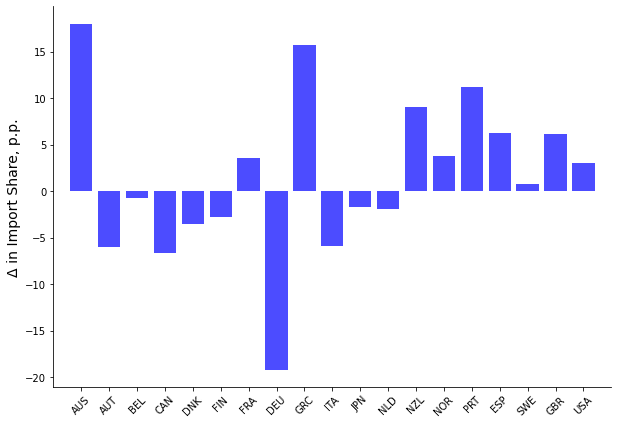

In [39]:
foo = dftrade[dftrade.importer_index == dftrade.exporter_index]

fig, ax = plt.subplots(figsize = (10,7))

ax.set_xlim(0,20)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xticks(np.arange(1,20))
ax.set_xticklabels(cntryname,rotation=45, fontsize = 10)

ax.set_ylabel("Δ in Import Share, p.p.", fontsize = 14)

ax.bar(foo.exporter_index,  100*(1 - foo.trade_efficient) - 100*(1 - foo.trademodel),
       alpha = 0.70, color = "blue")

plt.show()